In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error
%matplotlib inline

In [2]:
data=pd.read_csv('data.csv',header=None)
data.columns=['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Age']

In [3]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex               4177 non-null object
Length            4177 non-null float64
Diameter          4177 non-null float64
Height            4177 non-null float64
Whole weight      4177 non-null float64
Shucked weight    4177 non-null float64
Viscera weight    4177 non-null float64
Shell weight      4177 non-null float64
Age               4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 277.4+ KB


In [5]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


c:\users\new u\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


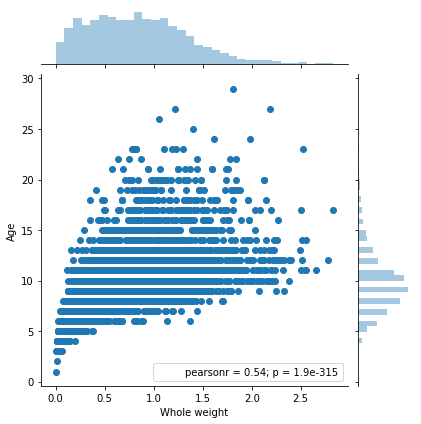

In [6]:
sns.jointplot(y='Age',x='Whole weight',data=data)

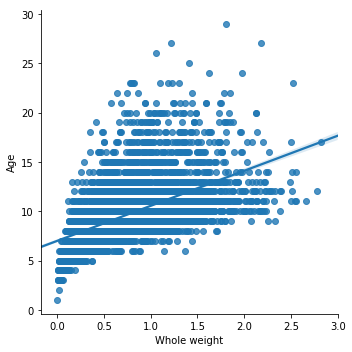

In [7]:
sns.lmplot(y='Age',x='Whole weight',data=data)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
data=pd.get_dummies(data)

In [10]:
X=data.drop('Age',axis=1)
y=data['Age']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lr = LinearRegression()

In [13]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
predictions = lr.predict(X_test)

In [15]:
predictions

array([11.15625   ,  6.91796875,  7.60546875, ...,  4.953125  ,
        9.98046875,  9.9921875 ])

In [16]:
print(mean_squared_error(y_test,predictions))

5.147993632290732


In [17]:
accuracy=[1 if x==y else 0 for (x,y) in zip(y_test,predictions)]
np.sum(np.array(accuracy))/len(predictions)

0.001594896331738437

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
rfc = RandomForestClassifier()

In [20]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [21]:
predictions = rfc.predict(X_test)

In [22]:
y_test.head()

2775    10
3317     7
3732    10
2946    11
1997     6
Name: Age, dtype: int64

In [23]:
for i in predictions[:5]:
    print(i)

11
4
9
9
7


In [24]:
print(mean_squared_error(y_test,predictions))

7.276714513556619


In [25]:
accuracy=[1 if x==y else 0 for (x,y) in zip(y_test,predictions)]

In [26]:
np.sum(np.array(accuracy))/len(predictions)

0.24561403508771928

In [27]:
from sklearn.ensemble import RandomForestRegressor

In [28]:
rfr = RandomForestRegressor()

In [29]:
rfr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [30]:
predrfr = rfr.predict(X_test)

In [34]:
predrfr[:10]

array([11.5,  6.7, 10.8,  9.7,  6.5, 10.1,  9.4, 12.7,  9.8,  4.9])

In [35]:
y_test.head(10)

2775    10
3317     7
3732    10
2946    11
1997     6
3505    10
3551     9
884     10
3733    10
812      6
Name: Age, dtype: int64

In [36]:
print(mean_squared_error(y_test,predrfr))

5.206722488038278
